<img src="./images/banner.png" width="800">

# Introduction to Evaluation Metrics for Linear Models (Regression)

Model evaluation is a critical step in the machine learning pipeline, particularly for regression models. It allows us to assess how well our model performs, compare different models, and make informed decisions about model selection and improvement.


Evaluating our models serves several crucial purposes:

1. **Performance Assessment**: It helps us understand how well our model is performing its intended task.
2. **Model Comparison**: We can compare different models or variations of the same model to choose the best one.
3. **Overfitting Detection**: Proper evaluation techniques can help us detect if our model is overfitting the training data.
4. **Generalization Estimation**: It gives us an idea of how well our model might perform on unseen data.


🔑 **Key Concept:** Model evaluation is not just about finding the "best" model, but about understanding the model's strengths, weaknesses, and behavior.


For regression problems, we typically use metrics that measure the difference between predicted values and actual values. These metrics fall into several categories:

1. **Error-based Metrics**: These measure the magnitude of prediction errors (e.g., Mean Squared Error, Mean Absolute Error).
2. **Goodness-of-Fit Metrics**: These assess how well the model explains the variance in the data (e.g., R-squared).
3. **Residual-based Analysis**: These involve examining the patterns and distributions of prediction errors.


When evaluating models, it's crucial to consider the context of your problem:

- **Domain Knowledge**: Understanding the specific requirements and constraints of your field can guide metric selection.
- **Stakeholder Needs**: Different stakeholders may prioritize different aspects of model performance.
- **Data Characteristics**: The nature of your data (e.g., presence of outliers) can influence which metrics are most appropriate.


Always use multiple evaluation metrics to get a comprehensive view of your model's performance. Relying on a single metric can be misleading.


Be aware of these common mistakes:

1. **Overfitting to the Evaluation Metric**: Optimizing too aggressively for a single metric can lead to poor generalization.
2. **Ignoring Model Complexity**: Simpler models that perform slightly worse might be preferable in some situations.
3. **Neglecting Statistical Significance**: Especially with small datasets, differences in metrics might not be statistically significant.


In the following sections, we'll dive deep into specific evaluation metrics for regression models. We'll explore how to calculate them, interpret their results, and understand their strengths and limitations.


> **Important Note:** Remember that no single metric tells the whole story. A holistic approach to model evaluation, combining multiple metrics and domain expertise, is key to building effective and reliable regression models.


By mastering these evaluation techniques, you'll be better equipped to develop high-quality regression models and communicate their performance effectively to stakeholders.

**Table of contents**<a id='toc0_'></a>    
- [Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)](#toc1_)    
  - [Mean Squared Error (MSE)](#toc1_1_)    
  - [Root Mean Squared Error (RMSE)](#toc1_2_)    
  - [Implementing MSE and RMSE in Python](#toc1_3_)    
  - [When to Use MSE vs RMSE](#toc1_4_)    
- [Mean Absolute Error (MAE)](#toc2_)    
  - [Implementing MAE in Python](#toc2_1_)    
  - [When to Use MAE](#toc2_2_)    
  - [Limitations of MAE](#toc2_3_)    
- [R-squared (Coefficient of Determination)](#toc3_)    
  - [Interpreting R-squared](#toc3_1_)    
  - [Implementing R-squared in Python](#toc3_2_)    
  - [Advantages and Limitations of R-squared](#toc3_3_)    
  - [When to Use R-squared](#toc3_4_)    
- [Adjusted R-squared](#toc4_)    
  - [Implementing Adjusted R-squared in Python](#toc4_1_)    
  - [Advantages and Limiations of Adjusted R-squared](#toc4_2_)    
  - [When to Use Adjusted R-squared](#toc4_3_)    
- [Residual Analysis](#toc5_)    
  - [What are Residuals?](#toc5_1_)    
  - [Key Components of Residual Analysis](#toc5_2_)    
  - [Interpreting Residual Plots](#toc5_3_)    
- [Comparing and Choosing Evaluation Metrics](#toc6_)    
  - [Comparison of Metrics](#toc6_1_)    
  - [Factors to Consider When Choosing Metrics](#toc6_2_)    
  - [Guidelines for Choosing Metrics](#toc6_3_)    
  - [Example Scenario](#toc6_4_)    
- [Summary and Best Practices](#toc7_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_'></a>[Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)](#toc0_)

Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) are fundamental metrics for evaluating regression models. They provide a measure of the average magnitude of the model's prediction errors. MSE is widely used in practice due to its simplicity and mathematical properties, while RMSE is preferred when we want the error metric to be in the same units as the target variable. Let's explore these metrics in detail.


### <a id='toc1_1_'></a>[Mean Squared Error (MSE)](#toc0_)


MSE is calculated by taking the average of the squared differences between predicted and actual values. It's one of the most widely used metrics for regression problems:

$$ MSE = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2 $$

Where:
- $n$ is the number of observations
- $y_i$ is the actual value
- $\hat{y}_i$ is the predicted value


Some key characteristics of MSE include:
1. **Always Non-Negative**: MSE is always ≥ 0, with 0 indicating perfect prediction.
2. **Sensitive to Outliers**: Squaring the errors makes MSE particularly sensitive to large errors.
3. **Units**: MSE is expressed in squared units of the target variable.


> MSE heavily penalizes large errors due to the squaring operation, making it particularly useful when large errors are especially undesirable.


### <a id='toc1_2_'></a>[Root Mean Squared Error (RMSE)](#toc0_)


RMSE is simply the square root of the MSE. It's often preferred over MSE because it's in the same units as the target variable. RMSE is calculated as:

$$ RMSE = \sqrt{MSE} = \sqrt{\frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2} $$


RMSE shares many properties with MSE but has some distinct advantages:
1. **Interpretability**: RMSE is in the same units as the target variable, making it more interpretable than MSE.
2. **Still Sensitive to Outliers**: Like MSE, RMSE is sensitive to large errors.
3. **Popular in Practice**: RMSE is widely used and reported in many regression problems.


### <a id='toc1_3_'></a>[Implementing MSE and RMSE in Python](#toc0_)


Here's a simple implementation using NumPy:


In [1]:
import numpy as np

def mse(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

def rmse(y_true, y_pred):
    return np.sqrt(mse(y_true, y_pred))

# Example usage
y_true = np.array([3, -0.5, 2, 7])
y_pred = np.array([2.5, 0.0, 2, 8])

print(f"MSE: {mse(y_true, y_pred):.4f}")
print(f"RMSE: {rmse(y_true, y_pred):.4f}")

MSE: 0.3750
RMSE: 0.6124


### <a id='toc1_4_'></a>[When to Use MSE vs RMSE](#toc0_)


- Use **MSE** when:
  - You want to give more weight to large errors.
  - You're using it as a loss function for optimization.

- Use **RMSE** when:
  - You want the error metric to be in the same units as the target variable.
  - You're communicating results to non-technical stakeholders.


> **Important Note:** Both MSE and RMSE are sensitive to outliers. In datasets with extreme outliers, consider using robust metrics like Mean Absolute Error (MAE) or median-based metrics.


Now that you understand MSE and RMSE, let's explore their strengths and limitations:
1. **Scale Dependence**: Both MSE and RMSE are scale-dependent, making it difficult to compare models across different datasets or target variables with different scales.
2. **Outlier Sensitivity**: Large errors have a disproportionate effect on these metrics.
3. **Lack of Direction**: They don't indicate whether the model is overpredicting or underpredicting.


Understanding the nuances of MSE and RMSE helps in choosing the right metric for your specific problem and interpreting the results correctly. Remember, a lower MSE or RMSE indicates better model performance, but always consider these metrics in conjunction with other evaluation techniques for a comprehensive assessment.

## <a id='toc2_'></a>[Mean Absolute Error (MAE)](#toc0_)

Mean Absolute Error (MAE) is another popular metric for evaluating regression models. It provides a measure of the average magnitude of errors in a set of predictions, without considering their direction. MAE is particularly useful when you want a metric that's easy to interpret and less sensitive to outliers compared to MSE/RMSE.


MAE is calculated by taking the average of the absolute differences between predicted and actual values. It's defined as:

$$ MAE = \frac{1}{n} \sum_{i=1}^n |y_i - \hat{y}_i| $$

Where:
- $n$ is the number of observations
- $y_i$ is the actual value
- $\hat{y}_i$ is the predicted value


🔑 **Key Concept:** MAE represents the average absolute deviation of predictions from the actual values.


Key features of MAE include:
1. **Interpretability**: MAE is easy to understand as it's in the same units as the target variable.
2. **Robustness to Outliers**: Unlike MSE/RMSE, MAE is less sensitive to outliers.
3. **Linear Scale**: MAE treats all errors on a linear scale, unlike MSE which squares the errors.
4. **Always Non-Negative**: Like MSE, MAE is always ≥ 0, with 0 indicating perfect prediction.


### <a id='toc2_1_'></a>[Implementing MAE in Python](#toc0_)


Here's a simple implementation using NumPy:


In [2]:
import numpy as np

def mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

# Example usage
y_true = np.array([3, -0.5, 2, 7])
y_pred = np.array([2.5, 0.0, 2, 8])

print(f"MAE: {mae(y_true, y_pred):.4f}")

MAE: 0.5000


### <a id='toc2_2_'></a>[When to Use MAE](#toc0_)


MAE is particularly useful in the following scenarios:

1. **Outlier Presence**: When your dataset contains outliers, MAE can provide a more robust measure of model performance.
2. **Uniform Error Importance**: When all errors should be treated equally, regardless of their magnitude.
3. **Interpretability Priority**: When you need a metric that's easily interpretable by non-technical stakeholders.


💡 **Pro Tip:** Consider using MAE in conjunction with MSE/RMSE. If MAE is significantly lower than RMSE, it might indicate the presence of outliers or high variance in individual errors.


Here's a comparison of MAE with MSE/RMSE:
| Aspect | MAE | MSE/RMSE |
|--------|-----|----------|
| Outlier Sensitivity | Less sensitive | More sensitive |
| Error Scale | Linear | Quadratic |
| Interpretability | Directly interpretable | RMSE is interpretable, MSE is not |
| Mathematical Properties | L1 norm | L2 norm |


### <a id='toc2_3_'></a>[Limitations of MAE](#toc0_)


1. **Insensitivity to Error Magnitude**: MAE treats all errors equally, which might not be desirable if larger errors are disproportionately more important in your context.
2. **Lack of Gradient**: The absolute value function isn't differentiable at zero, which can be problematic for some optimization algorithms.
3. **No Direction Information**: Like MSE/RMSE, MAE doesn't indicate whether the model is overpredicting or underpredicting.


> **Important Note:** While MAE is more robust to outliers, this can sometimes be a disadvantage if detecting and responding to large errors is crucial for your application.


When using MAE:

1. **Context Matters**: Consider the specific requirements of your problem. Is robustness to outliers more important than penalizing large errors?
2. **Combine with Other Metrics**: Use MAE alongside other metrics like MSE/RMSE and R-squared for a more comprehensive evaluation.
3. **Visualization**: Complement MAE with visualizations of residuals to get a fuller picture of model performance.


Choosing between MAE and MSE/RMSE can significantly impact how you interpret your model's performance and make decisions about model selection or improvement. Understanding the nuances of MAE helps in making informed choices and communicating results effectively.

## <a id='toc3_'></a>[R-squared (Coefficient of Determination)](#toc0_)

R-squared, also known as the coefficient of determination, is a widely used metric for evaluating the goodness of fit of regression models. It provides a measure of how well the model explains the variability in the target variable. R-squared values range from 0 to 1, with higher values indicating a better fit.


R-squared represents the proportion of the variance in the dependent variable that is predictable from the independent variable(s). It's calculated as:

$$ R^2 = 1 - \frac{\sum_{i=1}^n (y_i - \hat{y}_i)^2}{\sum_{i=1}^n (y_i - \bar{y})^2} $$

Where:
- $y_i$ is the actual value
- $\hat{y}_i$ is the predicted value
- $\bar{y}$ is the mean of the actual values


🔑 **Key Concept:** R-squared compares the fit of the chosen model with that of a horizontal straight line (the null hypothesis).


### <a id='toc3_1_'></a>[Interpreting R-squared](#toc0_)


- R-squared ranges from 0 to 1.
- An R-squared of 1 indicates that the model explains all the variability in the target variable.
- An R-squared of 0 means the model explains none of the variability.


For example, an R-squared of 0.7 suggests that 70% of the variance in the target variable is predictable from the independent variable(s).


### <a id='toc3_2_'></a>[Implementing R-squared in Python](#toc0_)


Here's a simple implementation using NumPy:


```python
import numpy as np

def r_squared(y_true, y_pred):
    ssr = np.sum((y_true - y_pred)**2)
    sst = np.sum((y_true - np.mean(y_true))**2)
    return 1 - (ssr / sst)

# Example usage
y_true = np.array([3, -0.5, 2, 7, 5])
y_pred = np.array([2.5, 0.0, 2, 8, 5.5])

print(f"R-squared: {r_squared(y_true, y_pred):.4f}")
```


### <a id='toc3_3_'></a>[Advantages and Limitations of R-squared](#toc0_)


The key advantages of R-squared include:
1. **Interpretability**: It provides an easily understandable measure of fit.
2. **Comparability**: It allows for comparison between models with different numbers of predictors.
3. **Scale Independence**: Unlike MSE or MAE, R-squared is not affected by the scale of the target variable.


While a higher R-squared generally indicates a better fit, be cautious of overfitting when R-squared is very close to 1, especially with a large number of predictors.


However, R-squared has several limitations:
1. **Sensitivity to Outliers**: R-squared can be sensitive to outliers, as they can significantly impact the total sum of squares.

2. **No Indication of Bias**: A high R-squared doesn't necessarily mean the model is unbiased. Always check residual plots.

3. **Doesn't Indicate Prediction Accuracy**: R-squared measures goodness of fit, not predictive accuracy.

4. **Increases with More Predictors**: Adding more predictors to a model will always increase R-squared, even if these predictors are not meaningful.

5. **Not Suitable for Nonlinear Relationships**: R-squared assumes a linear relationship between variables.


> **Important Note:** A low R-squared isn't always bad, and a high R-squared isn't always good. The interpretation depends heavily on the context of the problem and the nature of the data.


### <a id='toc3_4_'></a>[When to Use R-squared](#toc0_)


- Use R-squared when:
  - You want to understand how much of the variance in Y is explained by X.
  - Comparing the fit of different models for the same dataset.
  - Communicating model performance to non-technical stakeholders.


In practice, consider the following when using R-squared:
1. **Combine with Other Metrics**: Use R-squared in conjunction with error metrics like RMSE or MAE for a more comprehensive evaluation.

2. **Check Assumptions**: Ensure the assumptions of linear regression (linearity, independence, homoscedasticity, normality) are met for R-squared to be meaningful.

3. **Consider Adjusted R-squared**: For models with multiple predictors, adjusted R-squared can provide a more accurate measure of fit.


🤔 **Why This Matters:** Understanding R-squared helps in assessing how well your model captures the underlying patterns in the data. It's a crucial tool for model evaluation and selection, but it should be used thoughtfully and in context with other evaluation metrics and domain knowledge.

## <a id='toc4_'></a>[Adjusted R-squared](#toc0_)

Adjusted R-squared is a modified version of R-squared that addresses some of the limitations of the standard R-squared metric, particularly when dealing with multiple predictor variables. Adjusted R-squared penalizes the addition of extraneous predictors to the model, providing a more accurate measure of model fit.


While R-squared is a useful metric, it has a notable flaw: it always increases when you add more predictors to the model, even if those predictors are not actually improving the model's performance. Adjusted R-squared aims to solve this problem.


🔑 **Key Concept:** Adjusted R-squared penalizes the addition of extraneous predictors to the model.


Adjusted R-squared modifies the R-squared formula to account for the number of predictors in the model. It's calculated as:

$$ \text{Adjusted } R^2 = 1 - \left[\frac{(1-R^2)(n-1)}{n-k-1}\right] $$

Where:
- $R^2$ is the standard R-squared
- $n$ is the number of observations
- $k$ is the number of predictor variables


Here's how Adjusted R-squared differs from R-squared:
- Like R-squared, Adjusted R-squared ranges from 0 to 1 (it can be negative in extreme cases).
- A higher Adjusted R-squared indicates a better fit, considering the number of predictors.
- Adjusted R-squared will always be less than or equal to R-squared.


💡 **Pro Tip:** When comparing models with different numbers of predictors, always use Adjusted R-squared instead of standard R-squared.


### <a id='toc4_1_'></a>[Implementing Adjusted R-squared in Python](#toc0_)


Here's a simple implementation using NumPy:


```python
import numpy as np

def adjusted_r_squared(y_true, y_pred, n_predictors):
    n = len(y_true)
    r2 = r_squared(y_true, y_pred)  # Assuming r_squared function is defined
    return 1 - (1 - r2) * (n - 1) / (n - n_predictors - 1)

# Example usage
y_true = np.array([3, -0.5, 2, 7, 5])
y_pred = np.array([2.5, 0.0, 2, 8, 5.5])
n_predictors = 2

print(f"Adjusted R-squared: {adjusted_r_squared(y_true, y_pred, n_predictors):.4f}")
```


### <a id='toc4_2_'></a>[Advantages and Limiations of Adjusted R-squared](#toc0_)


Adjusted R-squared offers several advantages over standard R-squared:
1. **Penalizes Complexity**: It adjusts for the number of predictors in the model, preventing overfitting.
2. **Model Comparison**: It allows for a fairer comparison between models with different numbers of predictors.
3. **Feature Selection**: It can be used as a criterion for feature selection, helping to identify the most parsimonious model.


However, Adjusted R-squared has some limitations:
1. **Still Sensitive to Outliers**: Like R-squared, Adjusted R-squared can be influenced by outliers.
2. **Doesn't Guarantee Best Model**: A higher Adjusted R-squared doesn't always mean a better predictive model.
3. **Assumes Linear Relationships**: It's based on the same assumptions as R-squared and linear regression.


> **Important Note:** While Adjusted R-squared addresses the issue of adding irrelevant predictors, it doesn't completely solve the problem of overfitting. Always use it in conjunction with other evaluation methods.


### <a id='toc4_3_'></a>[When to Use Adjusted R-squared](#toc0_)


- Use Adjusted R-squared when:
  - Comparing models with different numbers of predictors.
  - Performing stepwise regression or feature selection.
  - Evaluating whether adding a new predictor improves the model significantly.


In practice, consider the following when using Adjusted R-squared:
1. **Interpretation**: A decrease in Adjusted R-squared when adding a predictor suggests that the new predictor may not be improving the model.

2. **Combine with Other Metrics**: Use Adjusted R-squared alongside other metrics and techniques like cross-validation for a comprehensive evaluation.

3. **Domain Knowledge**: Always consider the practical significance of predictors, not just their statistical significance.


| Aspect | R-squared | Adjusted R-squared |
|--------|-----------|---------------------|
| Accounts for Model Complexity | No | Yes |
| Always Increases with More Predictors | Yes | No |
| Can Decrease | No | Yes |
| Useful for Model Comparison | Limited | Yes |


Understanding and using Adjusted R-squared helps in building more parsimonious models and avoiding the pitfall of overfitting by adding unnecessary predictors. It's a crucial tool in the model selection process, especially when dealing with multiple linear regression models.

## <a id='toc5_'></a>[Residual Analysis](#toc0_)

Residual analysis is a crucial step in evaluating the performance and assumptions of linear regression models. It involves examining the differences between the observed values and the predicted values (residuals) to gain insights into the model's fit and potential improvements. Residual analysis helps in validating model assumptions, detecting outliers, and assessing the model's predictive accuracy.


### <a id='toc5_1_'></a>[What are Residuals?](#toc0_)


Residuals are the differences between the observed values and the values predicted by the model.

$$ \text{Residual} = y_i - \hat{y}_i $$

Where:
- $y_i$ is the observed value
- $\hat{y}_i$ is the predicted value


🔑 **Key Concept:** Residuals represent the portion of the dependent variable that the model fails to explain.


Residual analysis helps in:
1. Validating model assumptions
2. Identifying patterns the model missed
3. Detecting outliers and influential points
4. Assessing the appropriateness of the linear model


### <a id='toc5_2_'></a>[Key Components of Residual Analysis](#toc0_)


**1. Residual Plot**

A scatter plot of residuals versus predicted values.


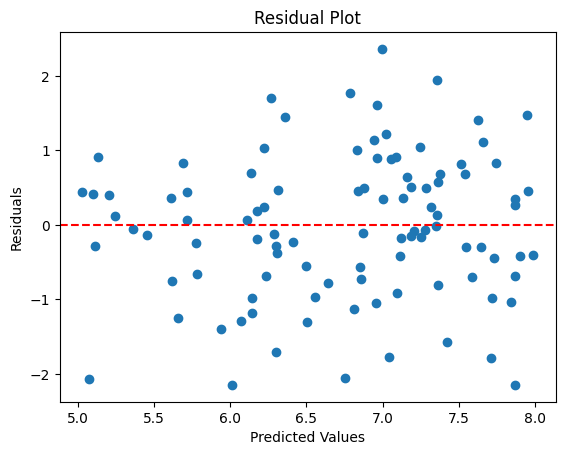

In [3]:
import matplotlib.pyplot as plt

X = np.random.rand(100)
y_true = 5 + 3*X + np.random.randn(100)
y_pred = 5 + 3*X
plt.scatter(y_pred, y_true - y_pred)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

**What to Look For:**
- Random scatter around the horizontal line at y=0
- No obvious patterns or trends
- Consistent spread across predicted values


**2. Q-Q Plot (Quantile-Quantile Plot)**

Used to assess if residuals are normally distributed.


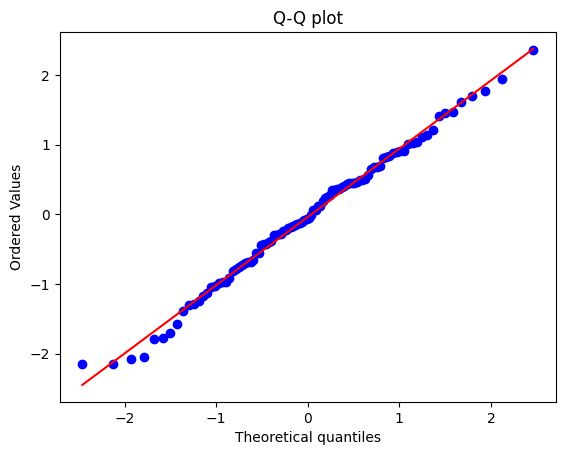

In [4]:
import scipy.stats as stats

fig, ax = plt.subplots()
stats.probplot(y_true - y_pred, plot=ax, fit=True)
ax.set_title("Q-Q plot")
plt.show()

**What to Look For:**
- Points should roughly follow a straight line
- Significant deviations suggest non-normality


**3. Scale-Location Plot**

Shows if residuals are spread equally along the ranges of predictors.


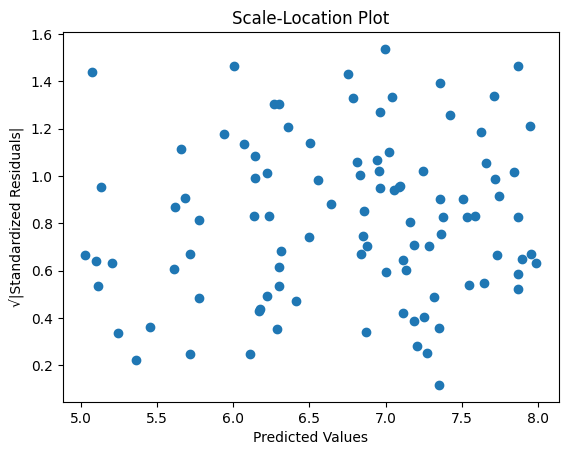

In [5]:
plt.scatter(y_pred, np.sqrt(np.abs(y_true - y_pred)))
plt.xlabel('Predicted Values')
plt.ylabel('√|Standardized Residuals|')
plt.title('Scale-Location Plot')
plt.show()

**What to Look For:**
- A horizontal line with randomly spread points


**4. Leverage Plot**

Identifies influential cases that have a large effect on the regression line.

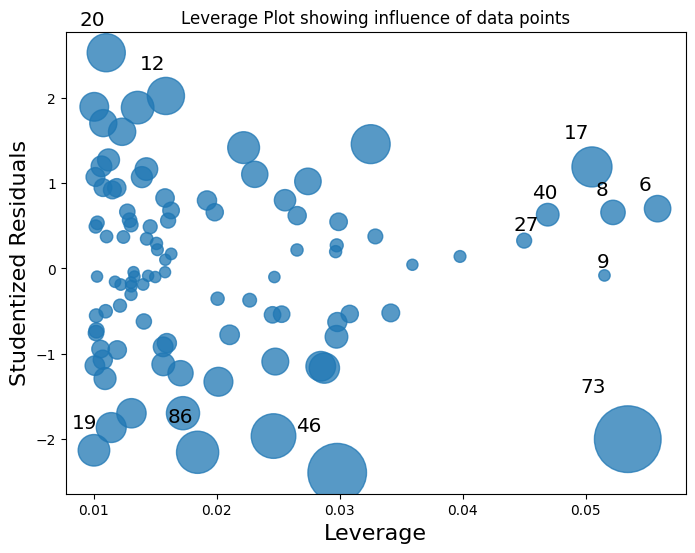

In [8]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Adding a constant to the model (intercept)
X = sm.add_constant(X)

# Fitting the linear regression model
model = sm.OLS(y_true, X).fit()

# Creating the leverage plot
fig, ax = plt.subplots(figsize=(8, 6))
sm.graphics.influence_plot(model, ax=ax, criterion="cooks")

plt.title('Leverage Plot showing influence of data points')
plt.show()

**What to Look For:**
- Points with high leverage and large residuals


> Always use multiple plots in your residual analysis. Each plot reveals different aspects of the model's performance and assumptions.


### <a id='toc5_3_'></a>[Interpreting Residual Plots](#toc0_)


When analyzing residual plots, consider the following aspects:
1. **Linearity**: If the relationship is linear, residuals should be randomly scattered around the horizontal line at 0.
2. **Homoscedasticity**: The spread of residuals should be consistent across predicted values.
3. **Independence**: There should be no clear pattern in the residual plot.
4. **Normality**: Residuals should be approximately normally distributed.


And watch out for these patterns:
- **Funnel Shape**: Indicates heteroscedasticity (non-constant variance)
- **U-Shape**: Suggests a non-linear relationship
- **Sloping Pattern**: Indicates a missing predictor or non-linear term


> **Important Note:** Violations of assumptions don't necessarily invalidate your model, but they do suggest areas for improvement or the need for different modeling approaches.


In practice, use residual analysis to guide your model development:
1. **Outliers**: Look for residuals that are much larger than others. These may be outliers or influential points.
2. **Transformation**: If assumptions are violated, consider transforming variables (e.g., log transformation).
3. **Model Refinement**: Use insights from residual analysis to refine your model, perhaps by adding interaction terms or polynomial features.
4. **Cross-Validation**: Remember that residual analysis on training data alone can be misleading. Always validate your findings with cross-validation.


🤔 **Why This Matters:** Residual analysis is not just about checking boxes; it's about deeply understanding your model's behavior. It can reveal subtle issues that summary statistics might miss and guide you towards more accurate and reliable models.


By mastering residual analysis, you gain a powerful tool for diagnosing model issues, improving model performance, and ensuring the validity of your regression results.

## <a id='toc6_'></a>[Comparing and Choosing Evaluation Metrics](#toc0_)

Selecting the right evaluation metrics is crucial for accurately assessing and comparing regression models. Different metrics provide different insights, and the choice depends on your specific problem, data characteristics, and stakeholder requirements. By understanding the strengths and limitations of each metric, you can make informed decisions about model selection, refinement, and deployment.


Let's recap the main metrics we've discussed:

1. Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)
2. Mean Absolute Error (MAE)
3. R-squared (R²)
4. Adjusted R-squared
5. Residual Analysis


🔑 **Key Concept:** No single metric tells the whole story. A combination of metrics often provides the most comprehensive evaluation.


### <a id='toc6_1_'></a>[Comparison of Metrics](#toc0_)


| Metric | Pros | Cons | Best Used When |
|--------|------|------|----------------|
| MSE/RMSE | - Penalizes large errors<br>- Widely used and understood | - Sensitive to outliers<br>- Scale-dependent | - Outliers are important<br>- Errors are normally distributed |
| MAE | - Robust to outliers<br>- Easily interpretable | - Doesn't penalize large errors as heavily | - Outliers should be treated equally<br>- Working with non-normal error distributions |
| R-squared | - Scale-independent<br>- Easy to interpret | - Can be misleading for non-linear relationships<br>- Sensitive to outliers | - Comparing models on the same dataset<br>- Communicating with non-technical stakeholders |
| Adjusted R-squared | - Accounts for model complexity<br>- Useful for feature selection | - Still sensitive to outliers<br>- Can be negative | - Comparing models with different numbers of predictors |
| Residual Analysis | - Provides visual insights<br>- Checks model assumptions | - Requires interpretation<br>- Can be subjective | - Diagnosing model issues<br>- Validating model assumptions |


### <a id='toc6_2_'></a>[Factors to Consider When Choosing Metrics](#toc0_)


1. **Nature of the Problem**
   - Are large errors more critical than small ones?
   - Is the goal prediction or explanation?

2. **Data Characteristics**
   - Presence of outliers
   - Scale of the target variable
   - Distribution of errors

3. **Model Complexity**
   - Number of predictors
   - Linear vs. non-linear relationships

4. **Stakeholder Requirements**
   - Need for interpretability
   - Specific business or domain constraints

5. **Comparison Context**
   - Are you comparing models with different scales or units?
   - Are you performing feature selection?


💡 **Pro Tip:** Always use a combination of metrics that cover different aspects of model performance. This provides a more robust evaluation.


### <a id='toc6_3_'></a>[Guidelines for Choosing Metrics](#toc0_)


1. **For General Performance Assessment:**
   - Use RMSE if you want to penalize large errors more heavily.
   - Use MAE if you want to treat all errors equally.

2. **For Model Comparison:**
   - Use R-squared or Adjusted R-squared for models with the same target variable.
   - Use scale-independent metrics like MAPE (Mean Absolute Percentage Error) when comparing across different scales.

3. **For Feature Selection:**
   - Adjusted R-squared is particularly useful.
   - Consider AIC (Akaike Information Criterion) or BIC (Bayesian Information Criterion) for more rigorous selection.

4. **For Assumption Checking:**
   - Always include residual analysis.

5. **For Communicating Results:**
   - R-squared is often easiest for non-technical audiences to understand.
   - RMSE or MAE can be useful when the units are meaningful in the business context.


In practice, be prepared to iterate on your choice of metrics as you gain more insights into your data and model. Always consider the specific requirements of your problem and the context in which your model will be used. 
1. **Start Broad:** Begin with a combination of error-based (RMSE/MAE), goodness-of-fit (R-squared), and visual (residual plots) metrics.

2. **Refine Based on Data:** If you discover outliers or non-normal distributions, adjust your choice of metrics accordingly.

3. **Consider Domain Knowledge:** Incorporate metrics that are standard or particularly meaningful in your field.

4. **Validate with Cross-Validation:** Use techniques like k-fold cross-validation to ensure your metrics are robust across different subsets of your data.

5. **Iterate:** As you gain more insights into your data and model, be prepared to revisit and adjust your choice of metrics.


> **Important Note:** Be cautious of optimizing for a single metric, as this can lead to overfitting or missing important aspects of model performance.


### <a id='toc6_4_'></a>[Example Scenario](#toc0_)


Imagine you're predicting house prices:

- Use RMSE to capture the impact of large prediction errors, as these could be costly in real estate.
- Include MAE for a more robust average error that's less affected by occasional large mispredictions.
- Report R-squared to give stakeholders an idea of how much variance your model explains.
- Perform residual analysis to check for any systematic biases in predictions across different price ranges.


🤔 **Why This Matters:** Choosing the right combination of evaluation metrics ensures that you're getting a comprehensive and accurate picture of your model's performance. It helps you make informed decisions about model selection, refinement, and deployment, ultimately leading to more reliable and useful regression models.

## <a id='toc7_'></a>[Summary and Best Practices](#toc0_)

As we conclude our exploration of evaluation metrics for linear regression models, let's recap the key points and outline some best practices to ensure effective model evaluation:


1. **Multiple Metrics Matter**: No single metric provides a complete picture of model performance. Use a combination of error-based metrics (MSE, RMSE, MAE), goodness-of-fit measures (R-squared, Adjusted R-squared), and visual tools (residual analysis).

2. **Context is Crucial**: The choice of metrics should be guided by the specific problem, data characteristics, and stakeholder needs.

3. **Assumptions Check**: Residual analysis is vital for validating the assumptions of linear regression and identifying potential issues.

4. **Model Complexity**: Adjusted R-squared helps in comparing models with different numbers of predictors, addressing the issue of overfitting.

5. **Interpretability**: Consider the ease of interpretation when choosing metrics, especially when communicating with non-technical stakeholders.


To ensure a robust evaluation process, follow these best practices:
1. **Start with a Diverse Set of Metrics**
   - Include at least one error-based metric (e.g., RMSE or MAE)
   - Use R-squared or Adjusted R-squared for goodness-of-fit
   - Always perform residual analysis

2. **Validate Assumptions**
   - Use residual plots to check linearity, homoscedasticity, and normality assumptions
   - Address violations through data transformations or alternative modeling approaches

3. **Cross-Validate**
   - Use techniques like k-fold cross-validation to ensure your metrics are robust
   - Be wary of overfitting, especially with complex models

4. **Consider the Scale**
   - Use scale-independent metrics (e.g., R-squared) when comparing models across different datasets
   - Be cautious when interpreting scale-dependent metrics (e.g., RMSE) across different scales

5. **Balance Complexity and Performance**
   - Use Adjusted R-squared or information criteria (AIC, BIC) for feature selection
   - Be wary of overly complex models that may not generalize well

6. **Contextualize Your Results**
   - Compare your model's performance to relevant benchmarks or baseline models
   - Consider the practical significance of improvements in metrics

7. **Communicate Effectively**
   - Choose metrics that resonate with your audience
   - Provide clear interpretations and visualizations of your results

8. **Iterate and Refine**
   - Use insights from your evaluation to guide model improvements
   - Be prepared to revisit your choice of metrics as you learn more about your data and problem


Always Document your evaluation process, including the rationale for chosen metrics. This aids in reproducibility and helps stakeholders understand your approach.


Effective evaluation of linear regression models is as much an art as it is a science. While the metrics and techniques we've discussed provide a solid framework, always be prepared to adapt your approach based on the specific nuances of your problem and data.


> **Important Note**: The goal of model evaluation is not just to get good numbers, but to gain insights that lead to better models and more informed decisions. Remember that model evaluation is an ongoing process. As new data becomes available or as the problem evolves, be prepared to reassess your model's performance and adjust your evaluation strategy accordingly.


By following these best practices and maintaining a thoughtful, comprehensive approach to model evaluation, you'll be well-equipped to develop robust, reliable linear regression models that provide genuine value in real-world applications.